# Trackensemble als Trackingreferenz

Um unabhängiger von der Objektdefinition als Referenz zu werden, könnte man einen Ensemblemittelwert aus allen Tracks der Trackexperimente benutzen. Zuerst laden wir uns die benötigten Pakete und dann sehen wir uns mal ein Beispiel an.

In [5]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

import glob

## Kreuzkorrelation mit Beispiel

In [7]:
track_id = "20130618_88"

In [6]:
track_data = xr.open_dataset("/vols/talos/home/stephan/data/radar_track/trackdata/haci_trackdata_{}.nc".format(track_id))

NameError: name 'track_id' is not defined

In [8]:
flow_dir = "/vols/talos/home/stephan/proj/2019-01_trackingstudie/data/tracking_experiments/flow_data/cross_correlation/"

In [9]:
flows = glob.glob("{}flow_{}*".format(flow_dir,track_id))

In [23]:
print flows

['/vols/talos/home/stephan/proj/2019-01_trackingstudie/data/tracking_experiments/flow_data/cross_correlation/flow_20130618_88_cc_experiment_0.nc', '/vols/talos/home/stephan/proj/2019-01_trackingstudie/data/tracking_experiments/flow_data/cross_correlation/flow_20130618_88_cc_experiment_1.nc', '/vols/talos/home/stephan/proj/2019-01_trackingstudie/data/tracking_experiments/flow_data/cross_correlation/flow_20130618_88_cc_experiment_2.nc', '/vols/talos/home/stephan/proj/2019-01_trackingstudie/data/tracking_experiments/flow_data/cross_correlation/flow_20130618_88_cc_experiment_3.nc']


In [12]:
flow_data = {i:[] for i in np.arange(0,4)}

In [14]:
for i in np.arange(0,4):
    flow_data[i] = xr.open_dataset(flows[i])

In [15]:
flow_data

{0: <xarray.Dataset>
 Dimensions:     (time_end: 12, time_start: 12, x: 51, y: 51)
 Coordinates:
     lat         (x, y) float32 51.729527 51.729755 51.730183 51.730587 ...
   * time_start  (time_start) datetime64[ns] 2013-06-18T12:30:00 ...
     lon         (x, y) float32 12.143866 12.190305 12.236766 12.283228 ...
   * time_end    (time_end) datetime64[ns] 2013-06-18T12:25:00 ...
 Dimensions without coordinates: x, y
 Data variables:
     u           (time_end, x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
     v           (time_end, x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
 Attributes:
     title:    Flow derived by cross correlation tracking  with a box size of ...,
 1: <xarray.Dataset>
 Dimensions:     (time_end: 12, time_start: 12, x: 51, y: 51)
 Coordinates:
     lat         (x, y) float32 51.729527 51.729755 51.730183 51.730587 ...
   * time_start  (time_start) datetime64[ns] 2013-06-18T12:30:00 ...
     lon         (x, y) float32 12.143866 12.190305 12.236

IndexError: index 12 is out of bounds for axis 0 with size 12

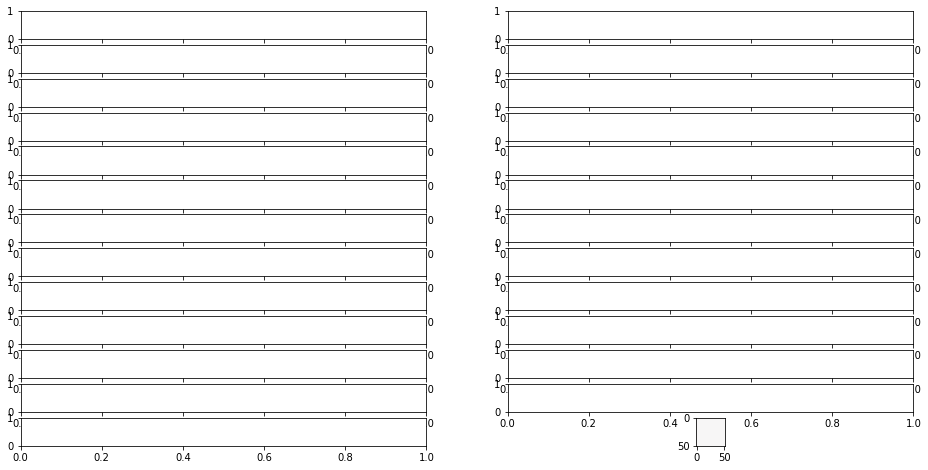

In [25]:
fig,ax = plt.subplots(13,2,figsize=(16,8))
for i in np.arange(0,4):
    for t in np.arange(0,13):
        ax[t,0] = plt.imshow(flow_data[i].u.data[t],vmin=-1,vmax=1,cmap='RdBu_r')
        ax[t,1] = plt.imshow(flow_data[i].v.data[t],vmin=-1,vmax=1,cmap='RdBu_r')

In [28]:
np.unique(flow_data[3].u.data[10])


array([0.])